In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fpdf import FPDF

In [78]:
sns.set(style="whitegrid")
plt.rcParams['axes.unicode_minus'] = False
output_dir = "eda_output"
os.makedirs(output_dir, exist_ok=True)

In [79]:
data = pd.read_csv("/content/amazon.csv")

In [80]:
print("Initial Data Shape:", data.shape)

Initial Data Shape: (1465, 16)


In [81]:
data.drop_duplicates(inplace=True)

In [82]:
data.dropna(inplace=True)

In [83]:
for col in ['discounted_price', 'actual_price']:
    data[col] = data[col].replace({'₹': '', ',': ''}, regex=True).astype(float)

In [84]:
data.to_csv(f"{output_dir}/cleaned_data.csv", index=False)

In [85]:
numeric_summary = data.describe()
numeric_summary.to_csv(f"{output_dir}/numeric_summary.csv")


In [86]:
category_summary = data['category'].value_counts().reset_index()
category_summary.columns = ['Category', 'Count']
category_summary.to_csv(f"{output_dir}/category_summary.csv", index=False)


In [87]:
top_products = data['product_name'].value_counts().head(10).reset_index()
top_products.columns = ['Product', 'Count']
top_products.to_csv(f"{output_dir}/top_products.csv", index=False)

In [88]:
top_customers = data['user_id'].value_counts().head(10).reset_index()
top_customers.columns = ['User ID', 'Purchases']
top_customers.to_csv(f"{output_dir}/top_customers.csv", index=False)

In [89]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix.to_csv(f"{output_dir}/correlation_matrix.csv")

/tmp/ipython-input-2535106875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Count", y="Product", palette="viridis")
/tmp/ipython-input-2535106875.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


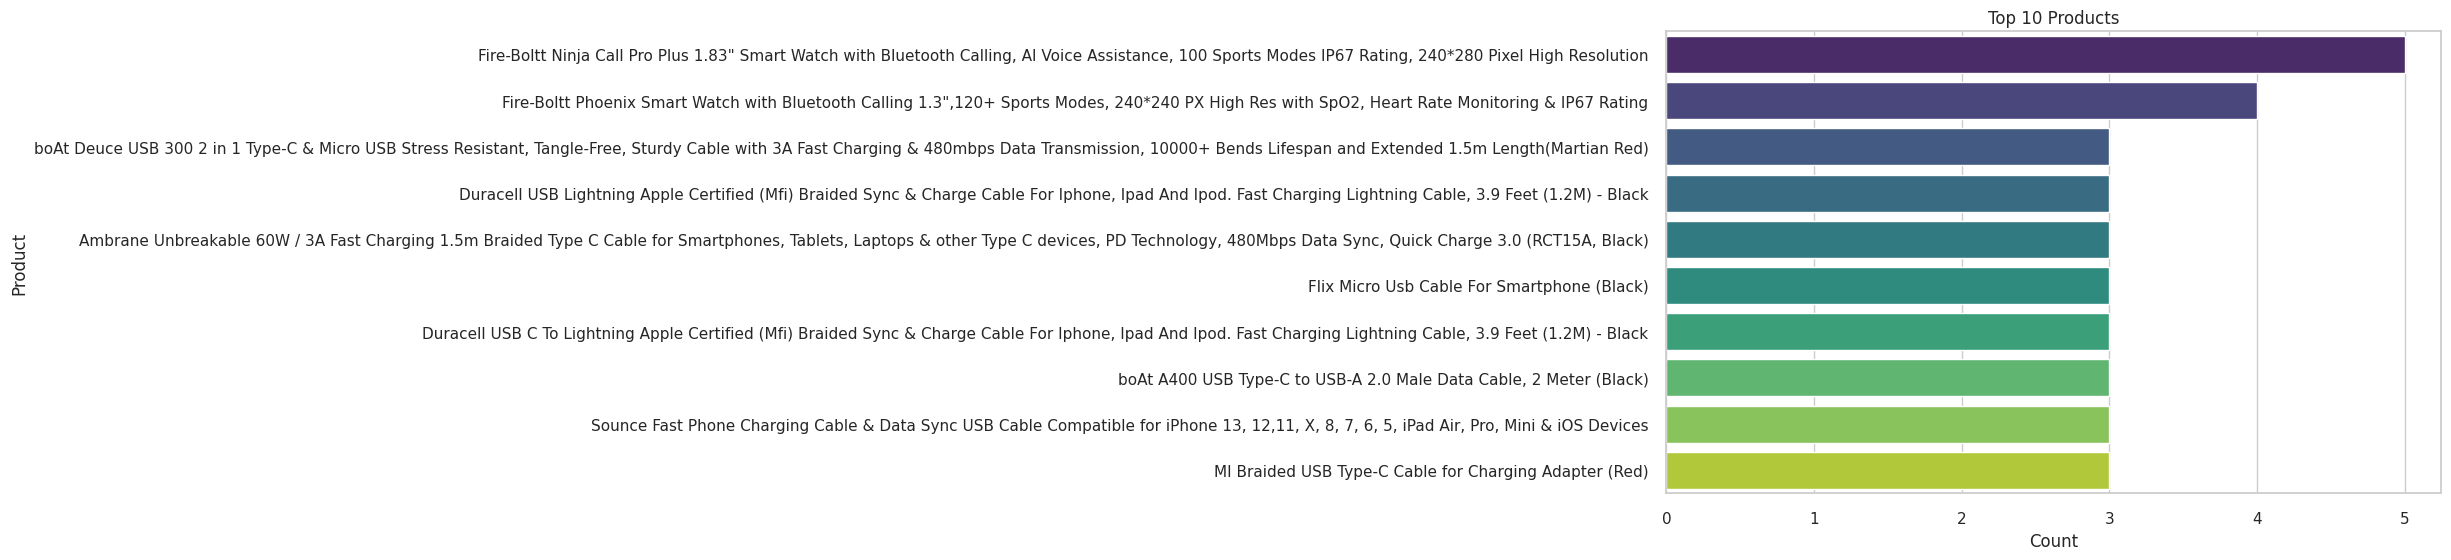

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x="Count", y="Product", palette="viridis")
plt.title("Top 10 Products")
plt.tight_layout()
plt.savefig(f"{output_dir}/fig_top_products.png")
plt.show()


/tmp/ipython-input-1151873937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_summary.head(10), x="Count", y="Category", palette="coolwarm")


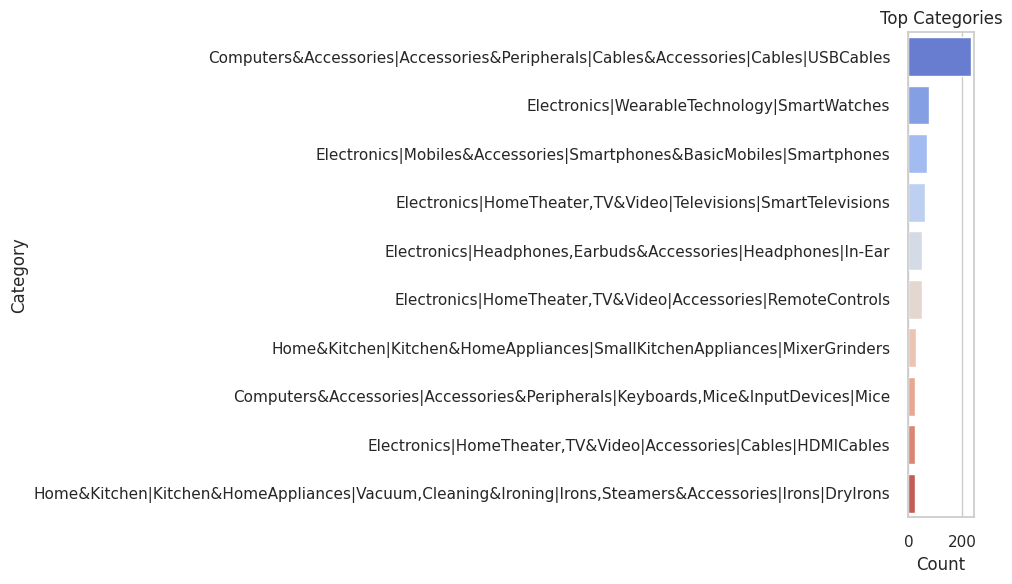

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category_summary.head(10), x="Count", y="Category", palette="coolwarm")
plt.title("Top Categories")
plt.tight_layout()
plt.savefig(f"{output_dir}/fig_top_categories.png")
plt.show()

/tmp/ipython-input-1884540446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x="Purchases", y="User ID", palette="plasma")
/tmp/ipython-input-1884540446.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


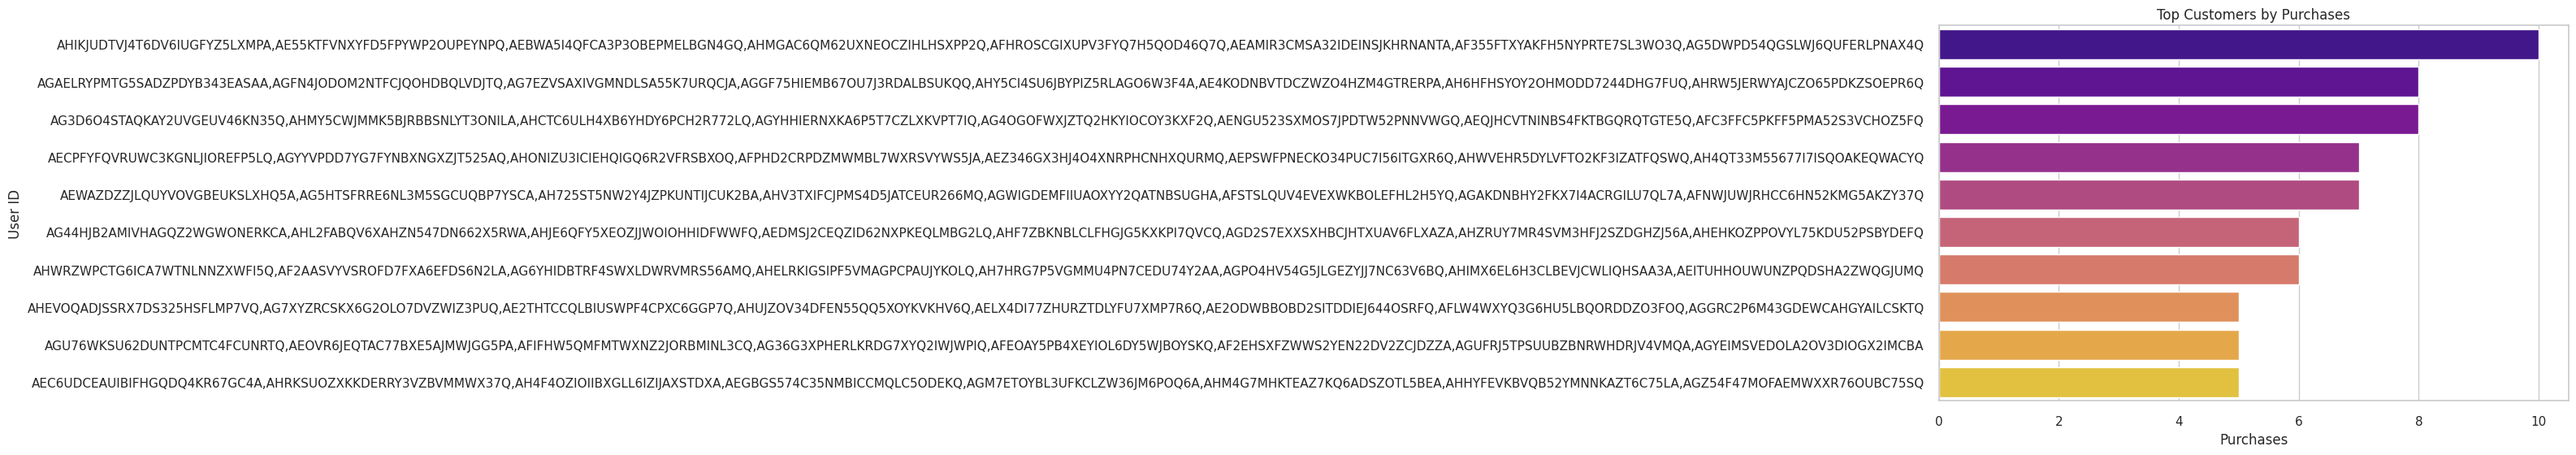

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x="Purchases", y="User ID", palette="plasma")
plt.title("Top Customers by Purchases")
plt.tight_layout()
plt.savefig(f"{output_dir}/fig_top_customers.png")
plt.show()

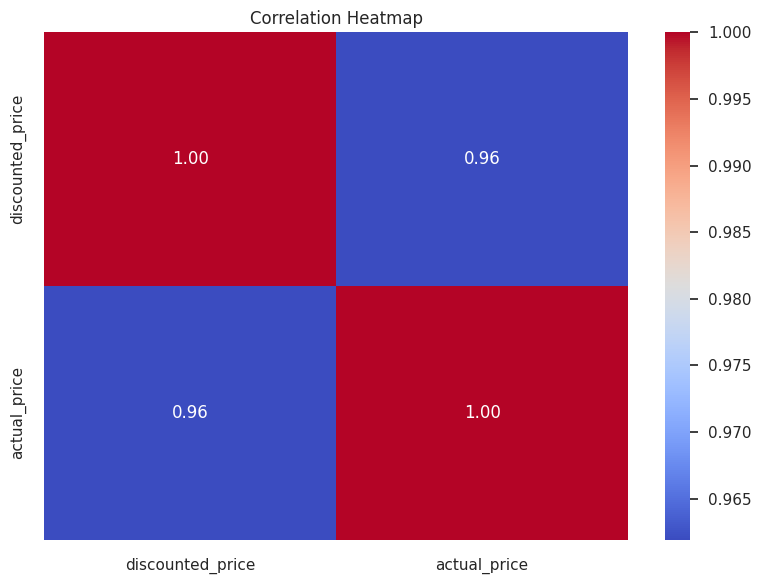

In [93]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(f"{output_dir}/fig_corr_matrix.png")
plt.show()

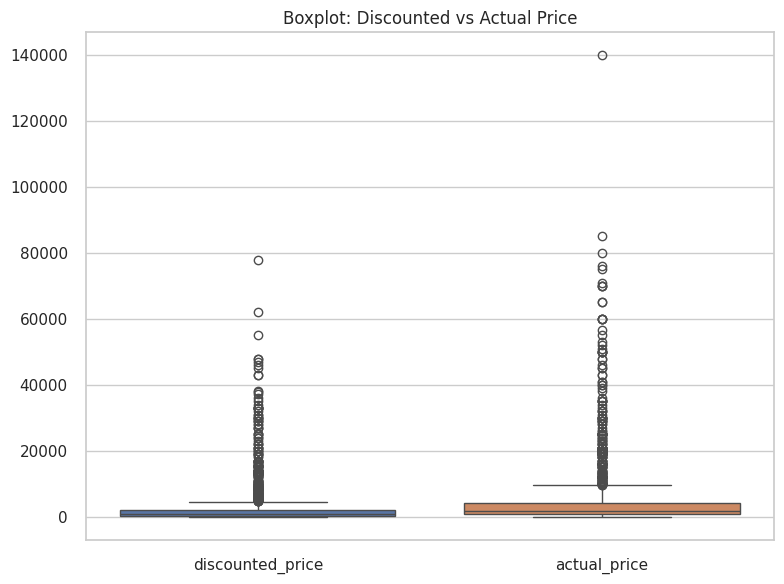

In [94]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['discounted_price', 'actual_price']])
plt.title("Boxplot: Discounted vs Actual Price")
plt.tight_layout()
plt.savefig(f"{output_dir}/fig_boxplot_prices.png")
plt.show()

/tmp/ipython-input-1159795031.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['discounted_price'], label="Discounted Price", shade=True)
/tmp/ipython-input-1159795031.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['actual_price'], label="Actual Price", shade=True)


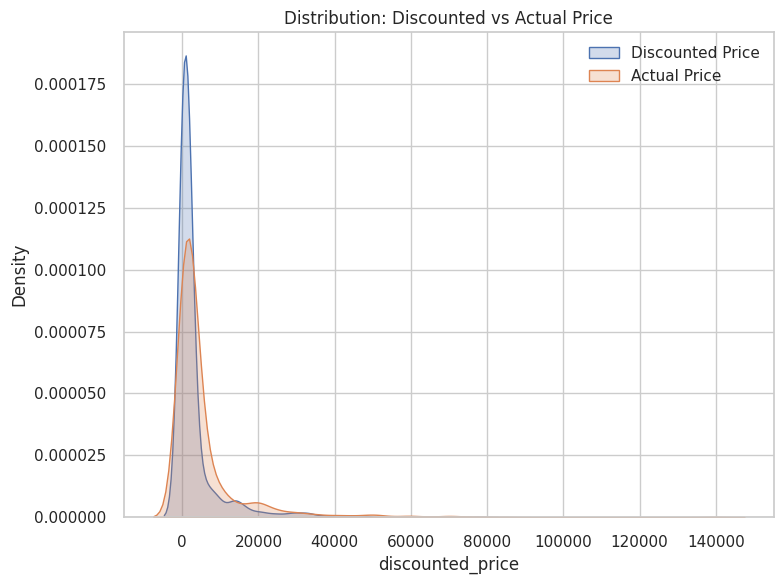

In [95]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['discounted_price'], label="Discounted Price", shade=True)
sns.kdeplot(data['actual_price'], label="Actual Price", shade=True)
plt.title("Distribution: Discounted vs Actual Price")
plt.legend()
plt.tight_layout()
plt.savefig(f"{output_dir}/fig_distribution_comparison.png")
plt.show()

In [96]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    trend = data.groupby(data['date'].dt.to_period('M'))['discounted_price'].sum()
    plt.figure(figsize=(10, 6))
    trend.plot()
    plt.title("Monthly Sales Trend")
    plt.tight_layout()
    plt.savefig(f"{output_dir}/fig_sales_trend.png")
    plt.show()

In [97]:
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 16)
        self.cell(0, 10, 'Amazon EDA Report', ln=True, align='C')
        self.ln(5)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, title, ln=True)
        self.ln(2)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 8, body)
        self.ln()

    def add_image(self, image_path, w=170):
        self.image(image_path, w=w)
        self.ln(5)

pdf = PDF()
pdf.add_page()

pdf.chapter_title("1. Overview")
pdf.chapter_body(f"Total Records: {len(data)}\nColumns: {list(data.columns)}")

pdf.chapter_title("2. Numeric Summary")
pdf.chapter_body(str(numeric_summary))

In [98]:
pdf.chapter_title("3. Key Visuals")
for img in ["fig_top_products.png", "fig_top_categories.png", "fig_top_customers.png",
            "fig_corr_matrix.png", "fig_boxplot_prices.png", "fig_distribution_comparison.png"]:
    pdf.add_image(f"{output_dir}/{img}")


In [99]:
pdf.output(f"{output_dir}/EDA_Report.pdf")
print(f"PDF report saved at {output_dir}/EDA_Report.pdf")

PDF report saved at eda_output/EDA_Report.pdf
